<a href="https://colab.research.google.com/github/cesaroliveiragoes/Machine-Learning-Data-Science-Classes/blob/main/Machine_Learning_and_Data_Science_Exs_02_Serie_Temporal_e_Analise_de_Correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv")

df

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi3,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,102.05,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,144.42,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49


In [ ]:
df.shape

(138, 38)

In [ ]:
df.columns.tolist()

['Unnamed: 0',
 'ANO_MES',
 'PIB',
 'BRL',
 'BRP',
 'BRT',
 'SLP',
 'SPP',
 'SPT',
 'PRL',
 'PRP',
 'PRT',
 'RJL',
 'RJP',
 'RJT',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'PIBi1',
 'PIBi2',
 'PIBi3',
 'PIBi4',
 'PIBi5',
 'PIBi6',
 'PIBi7',
 'PIBi8',
 'PIBi9',
 'PIBi10',
 'PIBi11',
 'PIBi12']

1) Avaliar que há 1 valor (para PIB) para cada unidade de tempo;

In [ ]:
df[['ANO_MES','PIB']]

,ANO_MES,PIB
0,jan/04,103.09
1,fev/04,102.05
2,mar/04,110.43
3,abr/04,106.77
4,mai/04,108.08
...,...,...
133,fev/15,144.42
134,mar/15,151.68
135,abr/15,147.03
136,mai/15,148.94


In [ ]:
repetidos = df['ANO_MES'].duplicated().any()
if repetidos:
    print("Há mais de um valor PIB para pelo menos uma unidade de tempo.")
else:
    print("Há exatamente um valor de PIB para cada unidade de tempo.")

Há exatamente um valor de PIB para cada unidade de tempo.


In [ ]:
# Nota-se que cada data possui um valor de PIB acumulado diferente, pois, são valores acumulados dos meses e é muito improvável de se repetirem.

2) Analisar (graficamente) se há sazonalidades na série do PIB;

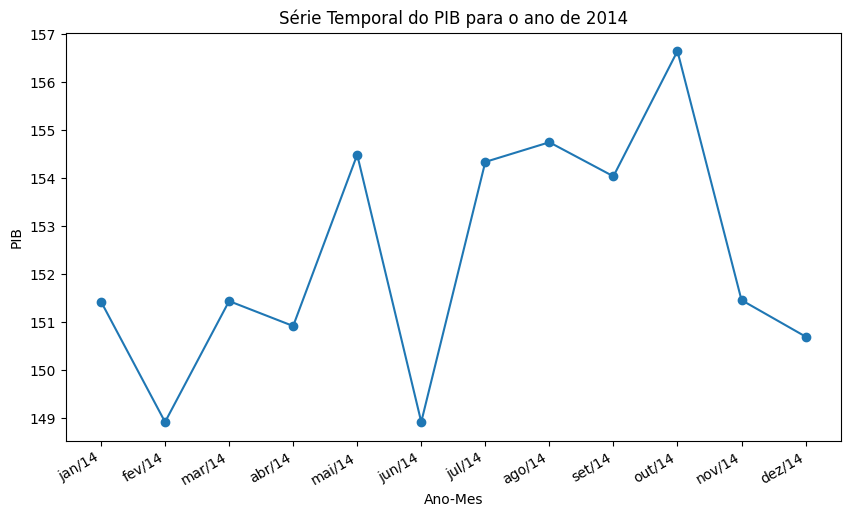

In [ ]:
# SAZONALIDADE MENSAL (Maior Granularidade)

meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov','dez']
ano_desejado = 2014

condicoes = []

for mes in meses:
    condicao = f"{mes}/{str(ano_desejado)[-2:]}"  # Gera a string do mês/ano (ex: jan/13)
    condicoes.append(df['ANO_MES'].str.contains(condicao))

condicao_final = pd.concat(condicoes, axis=1).any(axis=1)

df_12_meses_ano = df[condicao_final]

plt.figure(figsize=(10, 6))
plt.plot(df_12_meses_ano['ANO_MES'], df_12_meses_ano['PIB'], marker='o', linestyle='-')
plt.title(f'Série Temporal do PIB para o ano de {ano_desejado}')
plt.xlabel('Ano-Mes')
plt.ylabel('PIB')
plt.xticks(rotation=45)
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# Nota-se que o mês de Março, sempre há uma alta no PIB em todos os anos analisados, o que está relacionado com o escoamento de safras agrícolas
# e aumento de exportações, o que gera maior tráfego nas rodovias do país.
# Em outras palavras, com o aumento do tráfego rodoviária pesado, o PIB aumenta pois significa uma movimentação na economia interna

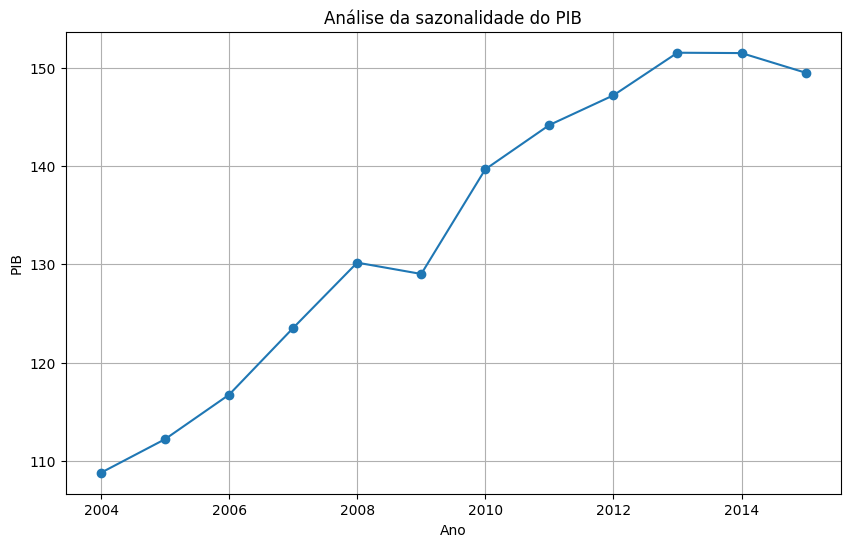

In [ ]:
# SAZONALIDADE ANUAL (Menor Granularidade)

# Converter a coluna ANO_MES para o formato de data
df['ANO_MES'] = pd.to_datetime(df['ANO_MES'], format='%b/%y', errors='coerce')
df

# Extrair o ano e o mês para colunas separadas
df['Ano'] = df['ANO_MES'].dt.year.astype(float).astype(pd.Int64Dtype())  # Converter para inteiro
df['Mes'] = df['ANO_MES'].dt.month.astype(float).astype(pd.Int64Dtype())  # Converter para inteiro
df

# Calcular a média anual do PIB
media_anual = df.groupby('Ano')['PIB'].mean()
media_anual

#análise da sazonalidade do PIB
plt.figure(figsize=(10, 6))
plt.plot(media_anual.index, media_anual.values, marker='o', linestyle='-')
plt.title('Análise da sazonalidade do PIB')
plt.xlabel('Ano')
plt.ylabel('PIB')
plt.grid(True)
plt.show()

In [ ]:
# Pode-se notar que o PIB neste período teve uma curva de crescimento constante, demonstrando uma pequena queda em meados de 2015

3) Analisar se há uma tendência/ruído
a. Dica: opcional, pode ser utilizada alguma função/pacote de
decomposição de série temporal

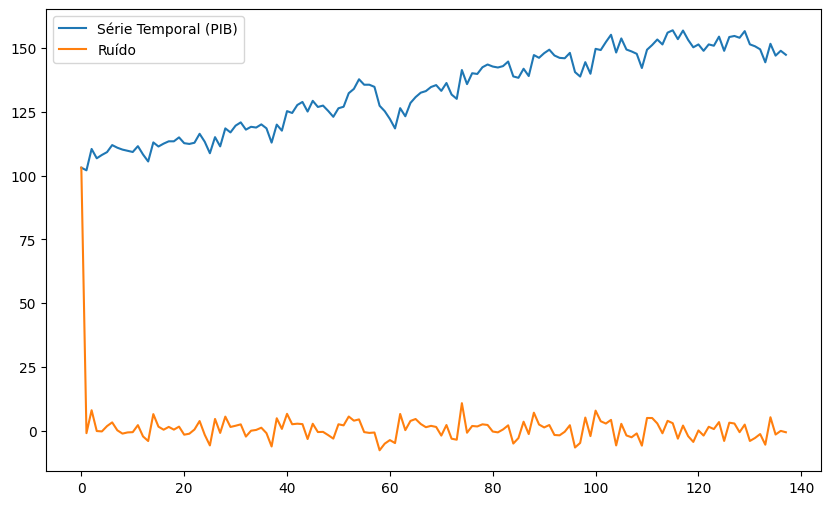

In [ ]:
serie_temporal = df['PIB']

# Ajustar o modelo ARIMA
modelo = ARIMA(serie_temporal, order=(1, 1, 1))  # Ajuste os parâmetros conforme necessário
resultado = modelo.fit()

# Plotar a série temporal e os resíduos
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal, label='Série Temporal (PIB)', linestyle='-')
plt.plot(resultado.resid, label='Ruído')
plt.legend()
plt.show()

# Se os resíduos forem próximos de zero e parecerem aleatórios ao longo do tempo, isso sugere que o modelo ARIMA está capturando adequadamente os padrões na série temporal
# e não há mais informações significativas a serem extraídas.

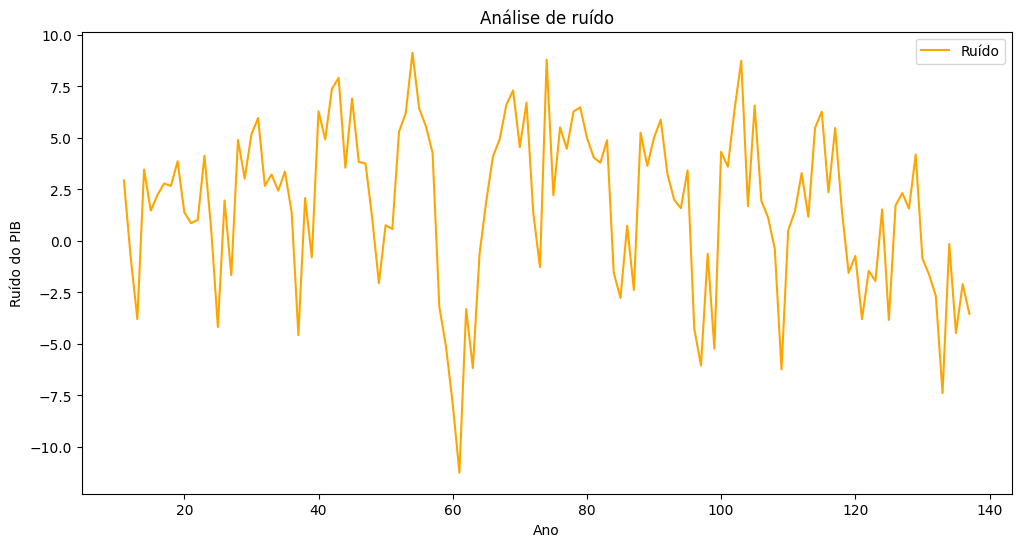

In [ ]:
# Calculando a média com janela de 12 meses
media_pib = df['PIB'].rolling(window=12).mean()
media_pib

# Calculando o ruído subtraindo a média_pbi
ruido = df['PIB'] - media_pib
ruido

# Gráfico do ruído
plt.figure(figsize=(12, 6))
plt.plot(ruido, label='Ruído', color='orange')  # Apenas o ruído
plt.legend()
plt.title('Análise de ruído')
plt.xlabel('Ano')
plt.ylabel('Ruído do PIB')  # Atualizado para refletir que é o ruído do PIB
plt.show()

4) Análise de correlação entre a variável PIB e as 12 variáveis de tráfego

In [ ]:
# as 12 + PIB colunas de variáveis de tráfego são 'PIB','BRL','BRP','BRT', 'SLP', 'SPP', 'SPT', 'PRL', 'PRP', 'PRT', 'RJL', 'RJP', 'RJT', ou seja, removendo ruídos deixando apenas as variáveis de trânsito

df_correlacao = df[['PIB','BRL','BRP','BRT', 'SLP', 'SPP', 'SPT', 'PRL', 'PRP', 'PRT', 'RJL', 'RJP', 'RJT']]
df_correlacao.reset_index(drop=True, inplace=True)

df_correlacao

,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,PRT,RJL,RJP,RJT
0,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,99.72,117.49,115.15,98.66,112.59
1,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,99.24,97.55,102.40,90.20,100.51
2,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,118.44,96.27,105.88,107.36,106.11
3,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,117.25,100.96,105.64,99.25,104.65
4,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,117.08,97.02,106.74,102.29,106.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,115.10,141.47,132.48,115.71,129.70
134,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,153.95,149.51,141.81,135.50,140.47
135,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,136.55,152.55,138.93,122.07,135.90
136,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,141.91,146.34,141.03,125.93,138.27


In [ ]:
# Segue a correlação das variáveis
correlacao = df_correlacao.corr()
correlacao

,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,PRT,RJL,RJP,RJT
PIB,1.000000,0.875316,0.945026,0.923355,0.912627,0.940794,0.951017,0.733248,0.839292,0.825325,0.898519,0.942831,0.916856
BRL,0.875316,1.000000,0.767459,0.991358,0.993062,0.746181,0.972831,0.955565,0.718522,0.981076,0.979452,0.846981,0.970447
BRP,0.945026,0.767459,1.000000,0.844730,0.820792,0.995076,0.888951,0.592349,0.902659,0.723687,0.833051,0.964372,0.864668
BRT,0.923355,0.991358,0.844730,1.000000,0.996182,0.826268,0.993391,0.919659,0.782612,0.967285,0.987573,0.904601,0.986700
SLP,0.912627,0.993062,0.820792,0.996182,1.000000,0.802807,0.990845,0.919804,0.759298,0.961229,0.982256,0.881877,0.978191
SPP,0.940794,0.746181,0.995076,0.826268,0.802807,1.000000,0.875741,0.570393,0.866241,0.696353,0.811741,0.959666,0.845971
SPT,0.951017,0.972831,0.888951,0.993391,0.990845,0.875741,1.000000,0.875226,0.808810,0.936562,0.978696,0.931131,0.983231
PRL,0.733248,0.955565,0.592349,0.919659,0.919804,0.570393,0.875226,1.000000,0.556847,0.978079,0.905421,0.709462,0.886085
PRP,0.839292,0.718522,0.902659,0.782612,0.759298,0.866241,0.808810,0.556847,1.000000,0.717468,0.769610,0.828425,0.788056
PRT,0.825325,0.981076,0.723687,0.967285,0.961229,0.696353,0.936562,0.978079,0.717468,1.000000,0.952224,0.803776,0.940861


5) Incluir uma visualização gráfica da matriz de correlação entre PIB e as
variáveis de tráfego

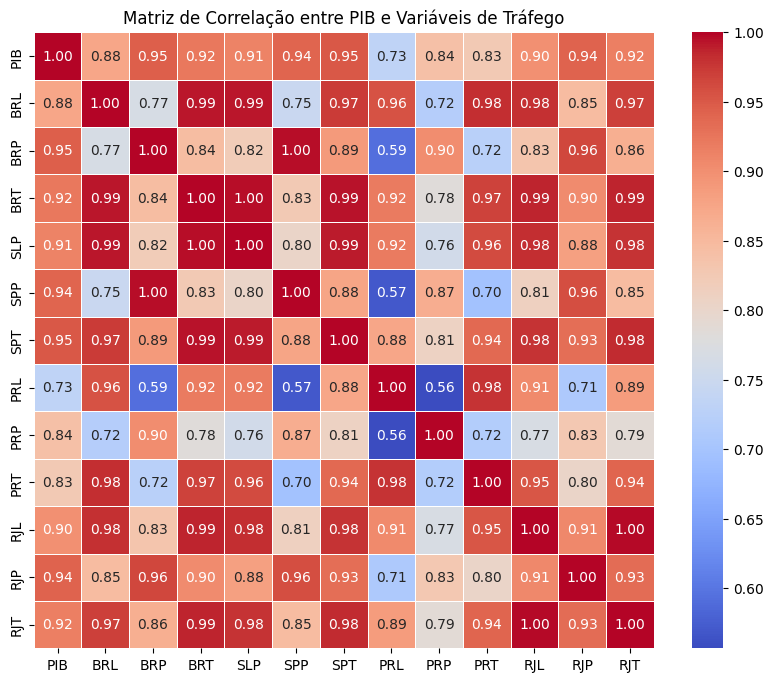

In [ ]:
matriz_correlacao = df_correlacao.corr()

# matriz de correlação usando um mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre PIB e Variáveis de Tráfego')
plt.show()

In [ ]:
# Este representação de Matriz Gráfica, mostra que grande maioria das variáveis tem a correlação considerada forte
# e poucas consideradas fracas. Dessa forma,a análise é válida tendo em consideração estas variáveis.

In [ ]:
# Integrantes

# Cesar Oliveira Goes RM: 98119
# Fiama dos Santos Trajano RM:97885
# Karina Maciel Palmeira  RM: 551770